In [1]:
import numpy as np
import statsmodels
from causalimpact import CausalImpact
import pandas as pd
from scipy import stats
import matplotlib
import seaborn as sns


In [2]:
statsmodels = 0.8

In [3]:
df = pd.DataFrame(pd.read_pickle('compliance.pkl'))
df.head()

,id,date,compliance
0,3LZJFK,2015-07-27,98
1,3LZJFK,2015-07-28,95
2,3LZJFK,2015-07-29,99
3,3LZJFK,2015-07-30,89
4,3LZJFK,2015-07-31,100


In [4]:
df.loc[(df.date >= '2017-08-23')&(df.date <='2017-12-08'), 'Fall Semester'] = 1

In [5]:
df2 = pd.DataFrame(pd.read_pickle('survey.pkl'))
df2.head(50)

,id,stepChallenge,gender_1,race_1,parentincome_1,Extraversion_1,Extraversion_2,Extraversion_6,Agreeableness_1,Agreeableness_2,Agreeableness_6,Conscientiousness_1,Conscientiousness_2,Conscientiousness_6,Openness_1,Openness_2,Openness_6,Neuroticism_1,Neuroticism_2,Neuroticism_6
0,3M4MLH,1.0,2.0,1.0,1.0,3.750,3.750,3.000,4.000000,3.555556,3.555556,3.444444,3.444444,2.666667,2.6,3.000000,2.555556,3.375,3.250,3.125
1,3NVWH4,0.0,2.0,2.0,5.0,3.875,4.250,NaN,3.000000,2.666667,NaN,3.555556,2.888889,NaN,3.0,3.555556,NaN,3.750,4.000,NaN
3,3YFW8D,1.0,2.0,5.0,3.0,2.875,NaN,NaN,3.000000,NaN,NaN,3.666667,NaN,NaN,3.2,NaN,NaN,3.125,NaN,NaN
4,4RNCLT,1.0,1.0,2.0,7.0,3.500,NaN,NaN,3.555556,NaN,NaN,3.222222,NaN,NaN,3.3,NaN,NaN,3.875,NaN,NaN
5,3TPKGY,0.0,2.0,2.0,3.0,4.000,3.625,NaN,2.888889,3.333333,NaN,3.888889,4.444445,NaN,3.8,4.555555,NaN,3.250,3.250,NaN
6,4RNTVP,0.0,2.0,5.0,8.0,3.625,NaN,NaN,3.555556,NaN,NaN,3.333333,NaN,NaN,2.9,NaN,NaN,4.125,NaN,NaN
7,3N9NSJ,0.0,2.0,5.0,7.0,3.125,3.750,NaN,3.888889,3.111111,NaN,3.777778,3.444444,NaN,3.6,3.777778,NaN,2.500,3.000,NaN
8,3M5VN5,1.0,1.0,5.0,5.0,4.250,3.875,3.500,4.555555,4.111111,4.222222,4.222222,4.444445,4.222222,3.5,3.555556,3.444444,3.000,2.750,2.875
9,3M5BDY,1.0,1.0,5.0,4.0,3.625,3.625,3.500,3.555556,3.555556,4.222222,4.111111,4.000000,4.222222,3.0,3.333333,3.333333,1.875,2.375,1.875
10,3MQ5QC,1.0,2.0,5.0,4.0,3.750,3.625,3.750,3.111111,3.888889,4.555555,3.555556,3.444444,3.444444,2.7,3.111111,3.888889,4.000,4.625,3.750


In [6]:
meanComp = df.groupby('date').compliance.mean()
meanComp.head()

date
2015-07-24    25.888889
2015-07-25    60.791667
2015-07-26    70.757576
2015-07-27    79.232558
2015-07-28    76.121212
Name: compliance, dtype: float64

In [7]:
import matplotlib.pyplot as plt

In [8]:
from scipy import stats

In [9]:
from scipy.stats import theilslopes

In [10]:
import statsmodels.formula.api as smf

In [11]:
#import statsmodels.api as sm

In [12]:
date_range = pd.date_range(start="2015-07-24", periods=1309)

pre_period = [pd.to_datetime(date) for date in ["2016-07-24", "2017-08-29"]]
post_period = [pd.to_datetime(date) for date in ["2017-08-30", "2019-02-20"]]

In [13]:
meanComp = meanComp.to_frame()

                    y    x1
2015-07-24  25.888889     1
2015-07-25  60.791667     2
2015-07-26  70.757576     3
2015-07-27  79.232558     4
2015-07-28  76.121212     5
2015-07-29  84.479452     6
2015-07-30  80.962500     7
2015-07-31  75.743902     8
2015-08-01  71.697674     9
2015-08-02  72.853933    10
2015-08-03  65.486486    11
2015-08-04  75.562500    12
2015-08-05  77.763359    13
2015-08-06  78.505837    14
2015-08-07  78.361624    15
2015-08-08  73.789298    16
2015-08-09  77.247588    17
2015-08-10  76.414634    18
2015-08-11  77.225146    19
2015-08-12  76.239437    20
2015-08-13  76.823529    21
2015-08-14  74.902235    22
2015-08-15  72.256267    23
2015-08-16  69.948780    24
2015-08-17  73.239130    25
2015-08-18  74.729216    26
2015-08-19  73.812352    27
2015-08-20  75.409953    28
2015-08-21  67.894309    29
2015-08-22  70.684959    30
...               ...   ...
2019-01-23  77.690789  1280
2019-01-24  77.503311  1281
2019-01-25  73.580000  1282
2019-01-26  72.02666

C:\python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


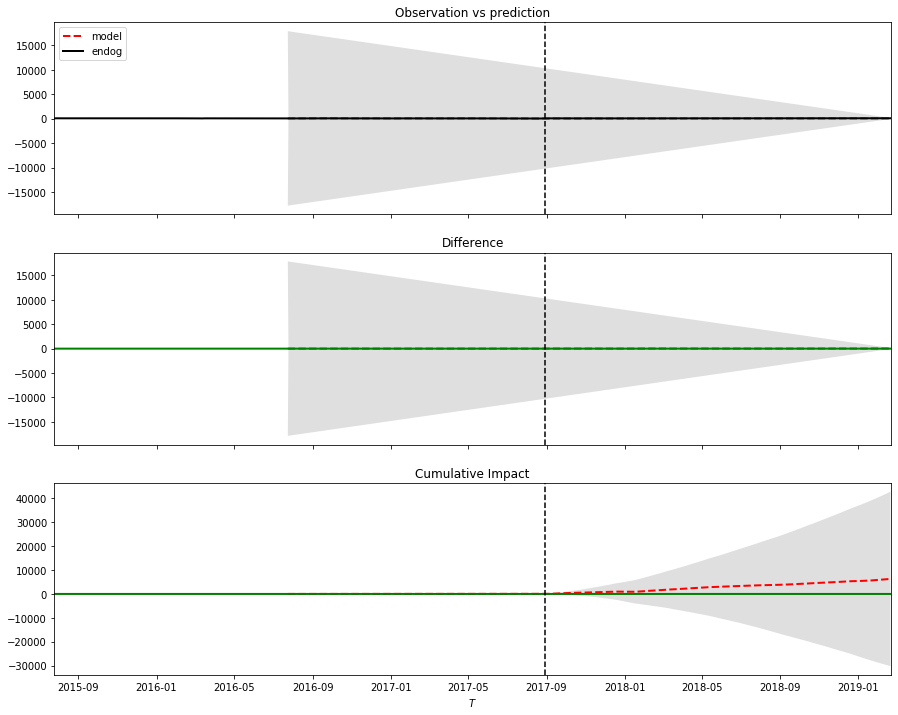

                          Average        Cumulative
Actual                         69             37736
Predicted                      58             31425
95% CI                  [-9, 125]    [-5110, 67960]
                                                   
Absolute Effect                11              6311
95% CI                  [79, -55]   [42847, -30224]
                                                   
Relative Effect             20.1%             20.1%
95% CI           [136.3%, -96.2%]  [136.3%, -96.2%]


In [14]:
exog = list(range(1,1310))
meanComp["x1"] = exog
meanComp.rename(columns={'date':'date','compliance':'y','x1':'x1'}, inplace=True)
meanComp.index = date_range
meanComp = meanComp[['y','x1']]

print(meanComp)
print(pre_period)
impact = CausalImpact(meanComp, pre_period, post_period)
impact.run()
impact.plot()
impact.summary()